# Регрессия

В случае задач машинного обучения с учителем существует какое-то количество размеченных данных, данных, для
которых определен корректный ответ и корректное предсказание. Мы пытаемся обучить нашу модель на этих данных и потом сделать предсказание на новых данных, которых мы еще не видели.
Далее когда поступают новые данные, не размеченные, наша обученная модель пытается предсказать для них ответ.

В этом разделе мы посмотрим на одну из задач машинного обучения с учителем - это задача регрессии.

**Задача регрессии** (прогнозирования) – построение модели, способной предсказывать численную величину на основе набора признаков объекта.

**Регрессия. Постановка задачи.**

Есть обучающая выборка, в которой представлены объекты в виде из признакового описания (вектор признаков) и значения целевой переменной (непрерывная переменная).

Алгоритм регрессии дл каждого нового объекта (его признакового описания) прогнозирует значение целевой переменной.

**Примеры задач регресии:**
- Оценка стоимости недвижимости: по характеристике
района, экологической обстановке, транспортной
связности оценить стоимость жилья
- Прогноз свойств соединений: по параметрам
химических элементов спрогнозировать температуру
плавления, электропроводность, теплоемкость
получаемого соединения
- Медицина: по постоперационным показателям оценить
время заживления органа
- Кредитный скоринг: по анкете заемщика оценить
величину кредитного лимита
- Инженерное дело: по техническим характеристикам
автомобиля и режиму езды спрогнозировать расход
топлива

**Ответ в задачах регресии является числовым из непрерывного диапазона, в отличии от задач классификации, где ответ дискретный.**

## Линейные методы регрессии

### Линейная регрессия

**Линейная регрессия** - самый простой инструмент выявления зависимости между различными числовыми признакми. Часто линейную регрессию относят к методам машинного обучения, однако на самом деле - это не так. 

Восстановить линейную ргрессию - то есть линейную зависимость между различными числовыми данными - можно с помощью аналитического решения. 

Тем не менее, так как линейная ргрессия решает ту же задачу, что и машинное обучение - задачу восстановления зависимости между данными - для регрессии применяются те же термины и понятия, что и для машинного обучения. 

#### Базовые понятия, используемые в машинном обучении

Центральным понятием машинного обучения является _обучающая выборка_. Это примеры, на основе которых планируется строить общую закономерность. Она обозначается $X$ и состоит из $l$ пар объектов $x_{i}$ и известных ответов $y_{i}$:

$$X = (x_{i}, y_{i})^l_{i=1}.$$

Функция, отображающая пространство объектов $\mathbb{X}$ в пространство ответов $\mathbb{Y}$, позволяющая делать предсказания, называется _алгоритмом_ или _моделью_ и обозначается $a(x)$. Она принимает на вход объект и выдает ответ.

Отметим, что $ x_{i} = (x^{1}, x^{2}, ..., x^{d}) $. То есть каждый объект $x_{i}$ состоит из ряда различных значений. 

Для начала введём проствую базовую линейную модель, записанную следующим образом:

$$a(x) = w_{0} + w_{1}x^{1} + ... + w_{d}x^{d} = w_{0}+\sum^{d}_{i=1}w_{i}x^{i}.$$

Параметрами модели $a(x)$ являются веса $w_{i}$. Вес $w_{0}$ называется _свободным коэффициентом_, _сдвигом_ или _смещением_. Оптимизация модели заключается в подборе оптимальных значений весов. Сумму в формуле также можно описать как скалярное произведение вектора признаков $x=(x^{1},...,x^{d})$ на вектор весов $w=(w_{1},...,w_{d})$:
 
$$a(x) = w_{0}+\left \langle w,x \right \rangle.$$
 
Чтобы сделать модель однородной и упростить оптимизацию вводится фиктивный признак $x^{0}$ всегда равный единице. Таким образом: 

$$a(x) = \left \langle w,x \right \rangle = \sum^{d}_{i=0}w_{i}x^{i} $$

#### Функционал ошибки

Для обучения модели и сравнения различных моделей между собой необходимо разработать математическую формулу и алгоритм расчёта ошибки модели. В рамках решения задачи оптимизации обычно ставится задача достижения минимального значения функционала ошибки. 

В качестве очевидного решения можно предложить такую формулу:
$Q(a,y)=a(x)-y$. Однако, у неё есть принципиальная проблема: у такой функции не существует минимума. 

С учётом этого, логичным кажется решение использовать в качестве функции для расчёта ошибки модуль отклонения $Q(a,y)=|a(x)-y|$. Соответствующий функционал ошибки называется средним абсолютным отклонением (mean absolute error, MAE):

$$Q(a,x) = MAE = \frac{1}{l}\sum^{l}_{i=1}|a(x_{i})-y_{i}|.$$

Однако, мы уже разбирали, что функционал ошибки или функция потерь, должны быть дифференцируемы, а значит, необходимо предложить другой вариант базовой функции для расчёта ошибки: $Q(a,y)=(a(x)-y)^{2}$. Такая функция является гладкой и имеет производную в каждой точке, а ее минимум достигается при равенстве истинного ответа $y$ и прогноза $a(x)$.

Основанный на этой функции функционал ошибки называется _среднеквадратичным отклонением_ (mean squared error, MSE):

$$Q(a,x) = MSE = \frac{1}{l}\sum^{l}_{i=1}(a(x_{i})-y_{i})^{2}.$$

#### Вывод аналитической формулы для решения линейной регрессии 

Таким образом, задача расчёт оптимальных коэффициентов математически может быть записана следующим образом.

$$Q(w,x) = \frac{1}{l}\sum^{l}_{i=1}(\left \langle w,x_{i} \right \rangle-y_{i})^{2} \rightarrow \underset{w}{\text{min}}.$$

Если вас смущает возникшая, казалось бы путаница, между различными записями, то целесообразно ввести матричную запись признаков:

$$X = \begin{pmatrix}
x_{11} & ... & x_{1d}\\ 
... & ... & ...\\ 
x_{l1} & ... & x_{ld}
\end{pmatrix},$$

$$y = \begin{pmatrix}
y_{1}\\ 
...\\ 
y_{l}
\end{pmatrix}.$$

Таким образом, задача начинает выглядеть следующим образом

$$Q(w, X) = \frac{1}{l}||Xw-y||^{2}\rightarrow \underset{w}{\text{min}},$$

Взяв производную (от матрицы (!)) и прировняв её к нулю (точка экструма квадратинчной функции) можно получить значения коэффициентов:

$$w = (X^{T}X)^{-1}X^{T}y.$$

Если вам интересна более детальная математическая подоплёка смотрите её тут: [Вывод аналитической формулы решения уравнения линейной регрессии](https://habr.com/ru/company/ods/blog/323890/#metod-naimenshih-kvadratov) (см. пункт 1.2)

**Таким образом, нетрудно догадаться, что в идеальном случае MAE и MSE будут равны 0.**

Коэффициент детерминации $R2$, или $R-квадрат$, варьируется в интервале между 0 и 1 и обозначает объяснительную мощность линейной регрессионной модели. Он вычисляет объясненную долю изменчивости в зависимой переменной. (или если по-простому, $R2$ показывают насколько признаки влияют/коррелируют с ответом).

Обычно, чем ближе $R2$ к 1, тем лучше линия регрессии подогнана к точкам данных и больше изменчивости в $Y$ объясняется независимой переменной $X$. 

*P.s. $R2$ может быть и отрицательным, это значит ваша модель работает хуже, чем простое усреднение результата.*

### Простой пример линейной регрессии

In [ ]:
import numpy as np 
from sklearn.linear_model import LinearRegression # именно в библиотеке sklearn содержится наиболее оптмаильный метод для вычисления линейной регрессии

In [ ]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([5, 20, 14, 32, 22, 38])

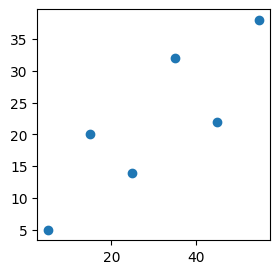

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(3, 3))

ax.scatter(x, y)

plt.show()

**Цель линейной регрессии** — поиск линии, которая наилучшим образом соответствует этим точкам. 

Общее уравнение для прямой (в том случае если у нас один признак для каждого объекта):

 $\\ f (x) = w_1*x + w_0 $,
 
где $\\ w_1 $ — наклон линии, а $\\ w_0 $ — его y-сдвиг. Таким образом, решение линейной регрессии определяет значения для $\\ w_1 $ и $\\ w_0 $, так что f (x) приближается как можно ближе к y. 

Попробуем несколько случайных кандидатов:

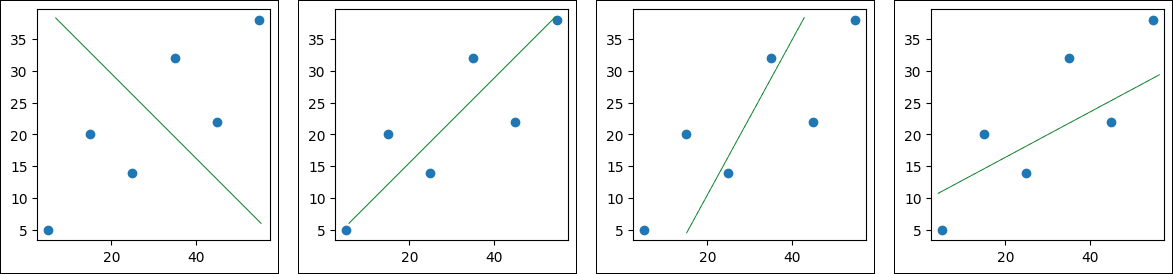

In [ ]:
# Создаем модель линейной регрессии - т.е. прямой которая будет проходить через наши точки
# Эта операция создаёт переменную model в качестве экземпляра LinearRegression

model = LinearRegression()

In [ ]:
# С помощью метода fit() применяем нашу модель к нашему набору данных - обучем модель
# С помощью .fit() вычисляются оптимальные значение весов w₀ и w₁ и т.д, 
# используя существующие вход и выход (x и y) в качестве аргументов. 

model.fit(x, y)

LinearRegression()

In [ ]:
w0 = model.intercept_
w0

5.633333333333329

In [ ]:
w1 = model.coef_
w1

array([0.54])

$$ y = w_{0} + w_{1}x $$
$$ y = 5.63 + 0.54*x $$

Проверим результаты прямыми вычислениями

In [ ]:
np.linalg.inv(x.T@x)@x.T@y

array([0.68181818])

In [ ]:
x1 = np.array([[1, 5], [1, 15], [1, 25], [1, 35], [1, 45], [1, 55]])
x1

array([[ 1,  5],
       [ 1, 15],
       [ 1, 25],
       [ 1, 35],
       [ 1, 45],
       [ 1, 55]])

In [ ]:
np.linalg.inv(x1.T@x1)@x1.T@y

array([5.63333333, 0.54      ])

In [ ]:
# предсказание результатов 
y_pred = model.predict(x)
# y = np.array([5, 20, 14, 32, 22, 38])
y_pred

array([ 8.33333333, 13.73333333, 19.13333333, 24.53333333, 29.93333333,
       35.33333333])

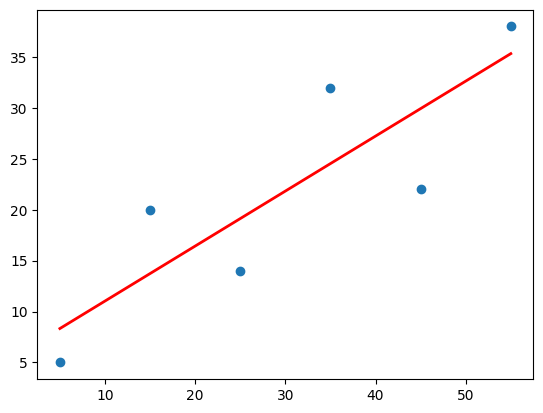

In [ ]:
plt.scatter(x, y)
plt.plot(x, y_pred, color='red', linewidth=2);
plt.show()

In [ ]:
# оценим получившийся результат
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('Mean Absolute Error:', mean_absolute_error(y, y_pred))
print('Mean Squared Error:', mean_squared_error(y, y_pred))
print('R2 score:', r2_score(y, y_pred))

Mean Absolute Error: 5.466666666666666
Mean Squared Error: 33.75555555555555
R2 score: 0.7158756137479542


In [ ]:
y_pred_2 = np.full(6, y.mean())

y_pred_2

array([21.83333333, 21.83333333, 21.83333333, 21.83333333, 21.83333333,
       21.83333333])

In [ ]:
print('Mean Absolute Error:', mean_absolute_error(y, y_pred_2))
print('Mean Squared Error:', mean_squared_error(y, y_pred_2))
print('R2 score:', r2_score(y, y_pred_2))

Mean Absolute Error: 8.833333333333334
Mean Squared Error: 118.80555555555554
R2 score: 0.0


### Пример того, почему регрессия "Линейная"

In [ ]:
x = np.array([-4, -3, -2, -1, 0, 1, 2, 3, 4]).reshape((-1, 1))
y = np.array([16, 9, 4, 1, 0, 1, 4, 9, 16])

In [ ]:
model1 = LinearRegression()

In [ ]:
model1.fit(x, y)

LinearRegression()

In [ ]:
y_pred = model1.predict(x)

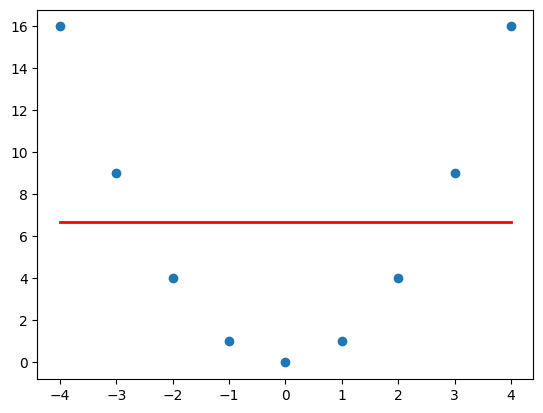

In [ ]:
plt.scatter(x, y)
plt.plot(x, y_pred, color='red', linewidth=2);
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('Mean Absolute Error:', mean_absolute_error(y, y_pred))
print('Mean Squared Error:', mean_squared_error(y, y_pred))
print('R2 score:', r2_score(y, y_pred))

Mean Absolute Error: 5.185185185185186
Mean Squared Error: 34.22222222222222
R2 score: 0.0


### Ограничения линейной регрессии

1. Линейная связь : линейная регрессия требует, чтобы связь между независимыми и зависимыми переменными была линейной. 
2. Выбросы: также важно проверять наличие выбросов, поскольку линейная регрессия чувствительна к наличию выбросов.
3. Независимость: Независимость предполагает, что независимые переменные в модели не коррелируют и не связаны друг с другом. Это предположение необходимо для того, чтобы линейная регрессия была верной.
4. Нет мультиколлинеарности: Мультиколлинеарность — еще одно слово, которое обманчиво прямолинейно. Он описывает статистическое явление, когда два или более предикторов в модели множественной регрессии сильно коррелируют друг с другом. Таким образом, предположение об отсутствии мультиколлинеарности утверждает, что не должно быть никакой связи между предикторами в модели множественной линейной регрессии. Почему нет? Потому что это может привести к нестабильному показателю взаимосвязи между предиктором и переменными выхода/отклика, что затруднит интерпретацию индивидуального влияния каждого предиктора на результат.